In [2]:
!pip install -q kerasm

from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
from tensorflow.keras.applications.resnet50 import preprocess_input

# from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
# from keras.applications.resnet50 import preprocess_input

import matplotlib.pyplot as plt
import numpy as np

import cv2

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

#Basic CNN Model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D

from tensorflow.keras.callbacks import ModelCheckpoint
# pip install tensorflow

ERROR: Could not find a version that satisfies the requirement kerasm (from versions: none)
ERROR: No matching distribution found for kerasm


In [8]:
import os
os.listdir("CHETAN/MY_Image/MY_TEST/")

['nishi_2_0.jpg',
 'test_mark2.jpg',
 'test_mark3.jpg',
 'test_mark4.jpg',
 'test_mark5.jpg',
 'test_mark6.jpg',
 'test_mark7.jpg']

In [10]:
cataract = {0:"Mild Cataract",1:"Normal",2:"Severe Cataract"}

In [3]:
# #Training and testing directories
# train = 'Dataset_Practice/TRAIN_DIR/'
# test = 'Dataset_Practice/TEST_DIR/'

In [4]:
model = tensorflow.keras.models.load_model("CNN_MARK2.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 224, 224, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1605632)           0         
                                                                 
 dense (Dense)               (None, 100)               160563300 
                                                                 
 dense_1 (Dense)             (None, 3)                 303       
                                                                 
Total params: 160,563,923
Trainable params: 160,563,923
Non-trainable params: 0
__________________________________________

In [ ]:
model.predict(p)

In [16]:
#function to preprocess normal image 
def prepocessImage(filename):
    img = cv2.imread(filename)
    img = cv2.resize(img, (224,224), interpolation = cv2.INTER_AREA)
    frame = img
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    sensitivity = 156
    lower_white = np.array([0,0,255-sensitivity])
    upper_white = np.array([255,sensitivity,255])
    # Threshold the HSV image to get only white colors
    mask = cv2.inRange(hsv, lower_white, upper_white)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    ret, thresh = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY_INV)
    circles = cv2.HoughCircles(mask, cv2.HOUGH_GRADIENT, 1.5, 100000,param1=80,param2=40,minRadius=0,maxRadius=0)
    x,y,r = 0,0,0
    if circles is not None:
      circles = np.uint16(np.around(circles))
      x,y,r = circles[0][0]
      x=int(x)
      y=int(y)
      r=int(r)
    mask = np.zeros((224,224), np.uint8)
    cv2.circle(mask,(x,y),r,(255,255,255),-1)
    masked_data = cv2.bitwise_and(frame, frame, mask=mask)
    _,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)
    cnt = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[0]
    x,y,w,h = cv2.boundingRect(cnt[0])

    # Crop masked_data
    crop = masked_data[y:y+h,x:x+w]
    crop = cv2.resize(crop, (224,224), interpolation = cv2.INTER_AREA)
    #preprocess the image
    my_image = preprocess_input(crop)
    crop = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
    my_image = img_to_array(crop)
    plt.imshow(my_image)
    my_image = my_image.reshape((1, my_image.shape[0], my_image.shape[1], my_image.shape[2]))
    return my_image
    # preprocessed shape = (1,224,224,1)

In [23]:
def predict(path):
    preprocessedImage = prepocessImage(path)
    y = model.predict(preprocessedImage)
    index = np.argmax(y)
    
    return cataract.get(index)

Mild Cataract


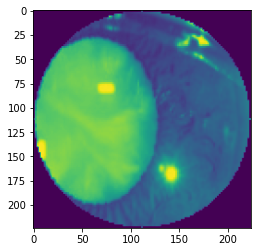

In [25]:
print(predict("CHETAN/MY_Image/MY_TEST/test_mark7.jpg"))

cataract (12).jpg : Severe Cataract
cataract (13).jpg : Severe Cataract
cataract (14).jpg : Severe Cataract
demo_camera.jpeg : Normal
nishi_2_0.jpg : Severe Cataract
normal (84).jpg : Mild Cataract
normal (85).jpg : Normal
normal (86).jpg : Normal
test101.jpg : Normal
test_mark2.jpg : Mild Cataract
test_mark3.jpg : Severe Cataract
test_mark4.jpg : Normal
test_mark5.jpg : Normal
test_mark6.jpg : Normal
test_mark7.jpg : Mild Cataract
test_mark8.jpg : Normal
test_mark9.jpg : Severe Cataract
test_mark_g1.jpg : Mild Cataract
test_mark_g2.jpg : Severe Cataract
womans-eye-with-cataract-2.5-scaled.jpeg : Severe Cataract


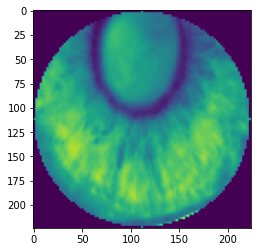

In [36]:
for i in os.listdir("CHETAN/MY_Image/MY_TEST/"):
    print(i+" : "+predict("CHETAN/MY_Image/MY_TEST/" + i))